Install https://pypi.org/project/ipython-autotime/ or outcomment %load_ext autotime

In [1]:
%load_ext autotime
import pandas as pd
import xarray as xr
import numpy as np
from mikeio.eum import EUMType, ItemInfo
from fmskill.model import ModelResult
from fmskill.observation import TrackObservation
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png')

time: 6.3 s (started: 2021-04-09 09:56:31 +02:00)


# Extract track without having observation as dfs0

In [2]:
fn = '../tests/testdata/NorthSeaHD_and_windspeed.dfsu'
mr = ModelResult(fn, name='HD')
mr.dfs

Dfsu2D
Number of elements: 958
Number of nodes: 570
Projection: LONG/LAT
Items:
  0:  Surface elevation <Surface Elevation> (meter)
  1:  Wind speed <Wind speed> (meter per sec)
Time: 67 steps with dt=3600.0s
      2017-10-27 00:00:00 -- 2017-10-29 18:00:00

time: 485 ms (started: 2021-04-09 09:56:38 +02:00)


In [3]:
fn = '../tests/testdata/altimetry_NorthSea_20171027.csv'
df = pd.read_csv(fn, index_col=0, parse_dates=True)

time: 47 ms (started: 2021-04-09 09:56:38 +02:00)


In [4]:
o1 = TrackObservation(df, item=2, name='alti')
o1.itemInfo = ItemInfo(EUMType.Surface_Elevation)    # if TrackObservation is created with a df, itemInfo needs to be added manually

time: 0 ns (started: 2021-04-09 09:56:38 +02:00)


In [5]:
mr.add_observation(o1, item=0)

time: 0 ns (started: 2021-04-09 09:56:38 +02:00)


In [6]:
cc = mr.extract()

time: 203 ms (started: 2021-04-09 09:56:38 +02:00)


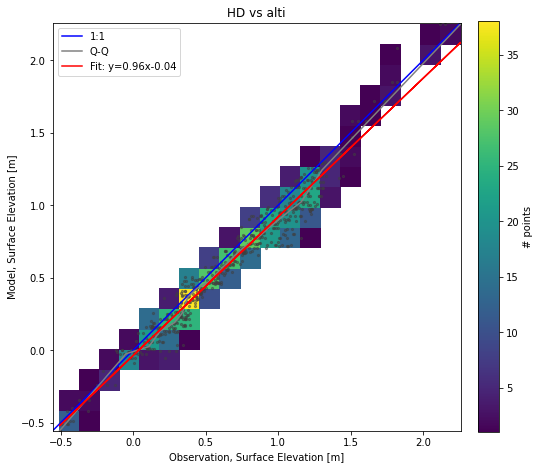

time: 953 ms (started: 2021-04-09 09:56:39 +02:00)


In [7]:
cc['alti'].scatter()

# Extract track from dfs0
ModelResult is now a dfs0

In [8]:
fn = '../tests/testdata/NorthSeaHD_extracted_track.dfs0'
mr = ModelResult(fn, name='HD')
mr.dfs

<mikeio.Dfs0>
Timeaxis: TimeAxisType.NonEquidistantCalendar
Items:
  0:  Longitude <Undefined> (undefined)
  1:  Latitude <Undefined> (undefined)
  2:  Model_surface_elevation <Undefined> (undefined)
  3:  Model_wind_speed <Undefined> (undefined)

time: 0 ns (started: 2021-04-09 09:56:40 +02:00)


In [9]:
fn = '../tests/testdata/altimetry_NorthSea_20171027.csv'
df = pd.read_csv(fn, index_col=0, parse_dates=True)
o1 = TrackObservation(df, item=2, name='alti')

time: 15 ms (started: 2021-04-09 09:56:40 +02:00)


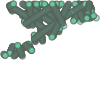

time: 94 ms (started: 2021-04-09 09:56:40 +02:00)


In [10]:
o1.geometry

In [11]:
mr.add_observation(o1, item=2)

time: 0 ns (started: 2021-04-09 09:56:40 +02:00)


In [12]:
cc = mr.extract()

time: 47 ms (started: 2021-04-09 09:56:40 +02:00)


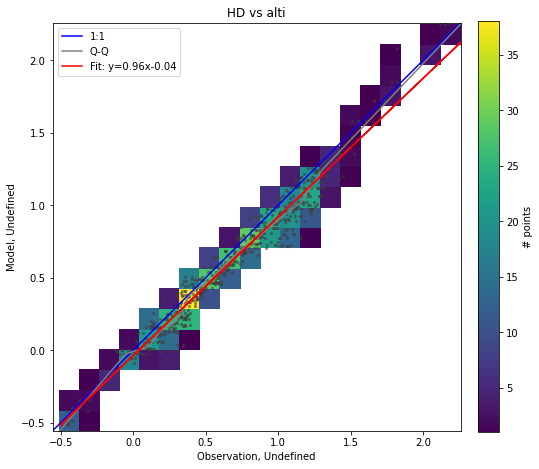

time: 703 ms (started: 2021-04-09 09:56:40 +02:00)


In [13]:
cc['alti'].scatter()

# Big data
Run the download.ipynb first

In [14]:
fn = '../data/SW_gwm_3a_extracted_2018.dfs0'
mr = ModelResult(fn, name='GWM')

time: 0 ns (started: 2021-04-09 09:56:41 +02:00)


In [15]:
fn = '../data/altimetry_3a_2018_filter1.dfs0'
o1 = TrackObservation(fn, item=2, name='3a')

time: 2min 55s (started: 2021-04-09 09:56:41 +02:00)


In [16]:
mr.add_observation(o1, item=2)

time: 0 ns (started: 2021-04-09 09:59:36 +02:00)


In [17]:
cc = mr.extract()

time: 2min 19s (started: 2021-04-09 09:59:36 +02:00)


In [18]:
cc['3a'].skill(end='2018-1-15')

,n,bias,rmse,urmse,mae,cc,si,r2
observation,,,,,,,,
3a,372356,-0.475229,0.633093,0.418287,0.510757,0.940399,0.116879,0.968706


time: 3.84 s (started: 2021-04-09 10:01:55 +02:00)


In [19]:
cc['3a'].skill()

,n,bias,rmse,urmse,mae,cc,si,r2
observation,,,,,,,,
3a,9105364,-0.489382,0.645991,0.421675,0.520273,0.94304,0.11582,0.968518


time: 5.61 s (started: 2021-04-09 10:01:59 +02:00)


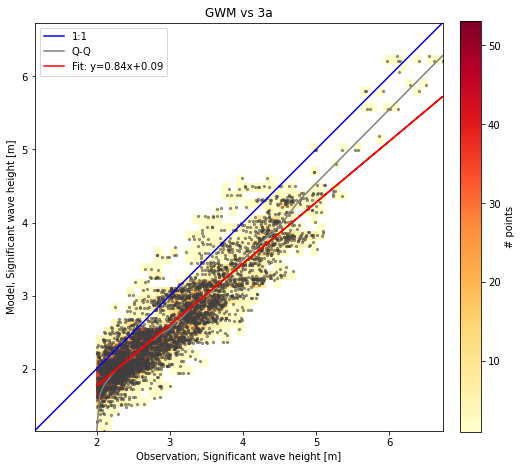

time: 3.95 s (started: 2021-04-09 10:02:05 +02:00)


In [20]:
cc['3a'].scatter(end='2018-7-1', area=[0,50,10,60], binsize=0.1, cmap='YlOrRd')

# Spatial binning

In [21]:
df = cc.all_df

time: 3.34 s (started: 2021-04-09 10:02:09 +02:00)


In [22]:
df['lonBin'] = pd.cut(df.x,bins=360)
df['latBin'] = pd.cut(df.y,bins=180)

time: 1.5 s (started: 2021-04-09 10:02:12 +02:00)


Find lon and lat bin centers, To-Do: better way?

In [23]:
lonBin = df['lonBin'].unique()
lon = [lon.mid for lon in lonBin]
df = df.join(pd.DataFrame(index=lonBin,data=dict(lon=lon)),on='lonBin')
latBin = df['latBin'].unique()
lat = [lat.mid for lat in latBin]
df = df.join(pd.DataFrame(index=latBin,data=dict(lat=lat)),on='latBin')
df.head()

,mod_name,obs_name,x,y,mod_val,obs_val,lonBin,latBin,lon,lat
2018-01-01 00:00:00.000000,GWM,3a,-33.706020,23.181158,2.292599,2.611,"(-34.0, -33.0]","(22.689, 23.573]",-33.5,23.131
2018-01-01 00:00:01.000005,GWM,3a,-33.720741,23.240074,2.292612,2.608,"(-34.0, -33.0]","(22.689, 23.573]",-33.5,23.131
2018-01-01 00:00:01.999999,GWM,3a,-33.735474,23.298990,2.292624,2.518,"(-34.0, -33.0]","(22.689, 23.573]",-33.5,23.131
2018-01-01 00:00:03.000004,GWM,3a,-33.750214,23.357904,2.292637,2.729,"(-34.0, -33.0]","(22.689, 23.573]",-33.5,23.131
2018-01-01 00:00:03.999998,GWM,3a,-33.764965,23.416819,2.292650,2.593,"(-34.0, -33.0]","(22.689, 23.573]",-33.5,23.131


time: 4.02 s (started: 2021-04-09 10:02:14 +02:00)


## pandas split - apply - combine

https://pandas.pydata.org/docs/user_guide/groupby.html#flexible-apply 


In [24]:
from fmskill import metrics
def compute_metrics(x):
   result = dict(N_obs=x['obs_val'].count(),
                 mean_obs=x['obs_val'].mean(),
                 N_mdl=x['mod_val'].count(),
                 mean_mdl=x['mod_val'].mean(),
                 n=len(x),
                 bias=metrics.bias(x['obs_val'],x['mod_val']),
                 rmse=metrics.rmse(x['obs_val'],x['mod_val']))
   return pd.Series(result, name="metrics")

time: 0 ns (started: 2021-04-09 10:02:18 +02:00)


In [25]:
QI = df.groupby(['lon','lat']).apply(compute_metrics)
QI = QI[QI.n>=30]
QI.head()

metrics           N_obs  mean_obs  N_mdl  mean_mdl     n      bias      rmse
lon     lat                                                                 
-179.68 -76.7035   30.0  2.889900   30.0  2.255722  30.0 -0.634178  0.696457
        -75.8200   46.0  3.084913   46.0  2.405674  46.0 -0.679239  0.827850
        -74.0530   45.0  2.970933   45.0  2.504309  45.0 -0.466624  0.699758
        -73.1695   46.0  2.934717   46.0  2.772933  46.0 -0.161785  0.419096
        -72.2860   75.0  2.867347   75.0  2.590579  75.0 -0.276767  0.411649

time: 1min 9s (started: 2021-04-09 10:02:18 +02:00)


In [26]:
ds = QI.to_xarray()

time: 31 ms (started: 2021-04-09 10:03:28 +02:00)


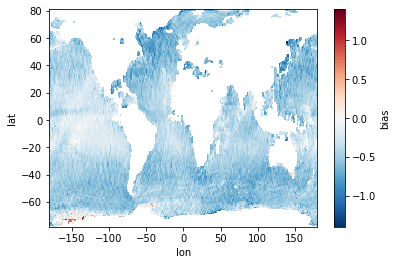

time: 593 ms (started: 2021-04-09 10:03:28 +02:00)


In [27]:
ds['bias'].plot(x='lon',y='lat')

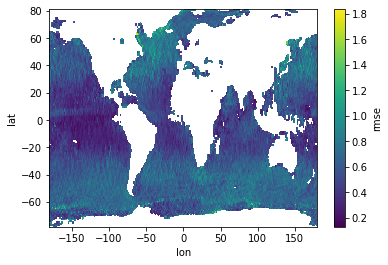

time: 594 ms (started: 2021-04-09 10:03:28 +02:00)


In [28]:
ds['rmse'].plot(x='lon',y='lat')

Performance difference if preselecting only required columns of df?

In [29]:
QI = df[['lon','lat','obs_val','mod_val']].groupby(['lon','lat']).apply(compute_metrics)
QI = QI[QI.n>=30]
QI.head()

metrics           N_obs  mean_obs  N_mdl  mean_mdl     n      bias      rmse
lon     lat                                                                 
-179.68 -76.7035   30.0  2.889900   30.0  2.255722  30.0 -0.634178  0.696457
        -75.8200   46.0  3.084913   46.0  2.405674  46.0 -0.679239  0.827850
        -74.0530   45.0  2.970933   45.0  2.504309  45.0 -0.466624  0.699758
        -73.1695   46.0  2.934717   46.0  2.772933  46.0 -0.161785  0.419096
        -72.2860   75.0  2.867347   75.0  2.590579  75.0 -0.276767  0.411649

time: 54.7 s (started: 2021-04-09 10:03:29 +02:00)


--> some improvement, keep in mind if number of columns increases

# Multi binning

## Spatial and monthly

Coarser spatial binning, else too little data per month.

To-Do: 'Auto-binning' utility based on min number of observations requested by user?

In [30]:
df = cc.all_df

time: 172 ms (started: 2021-04-09 10:04:24 +02:00)


In [31]:
df['lonBin'] = pd.cut(df.x,bins=90)
df['latBin'] = pd.cut(df.y,bins=45)
lonBin = df['lonBin'].unique()
lon = [lon.mid for lon in lonBin]
df = df.join(pd.DataFrame(index=lonBin,data=dict(lon=lon)),on='lonBin')
latBin = df['latBin'].unique()
lat = [lat.mid for lat in latBin]
df = df.join(pd.DataFrame(index=latBin,data=dict(lat=lat)),on='latBin')

time: 5 s (started: 2021-04-09 10:04:24 +02:00)


Technically not needed to add month column to dataframe, as groupby would accept df.index.month as input. But this way it is easier to pass it through to xarray later.

In [32]:
df['month'] = df.index.month

time: 1.2 s (started: 2021-04-09 10:04:29 +02:00)


In [33]:
QI = df.groupby(['month','lon','lat'])[['obs_val','mod_val']].apply(compute_metrics)
QI = QI[QI.n>=30]
QI.head()

metrics                N_obs  mean_obs  N_mdl  mean_mdl      n      bias  \
month lon     lat                                                          
1     -178.18 -69.194  111.0  3.059270  111.0  3.082899  111.0  0.023629   
              -65.660  443.0  3.114569  443.0  2.906647  443.0 -0.207921   
              -62.126  664.0  3.412003  664.0  3.154587  664.0 -0.257416   
              -58.592  541.0  3.447275  541.0  3.162531  541.0 -0.284744   
              -55.058  487.0  3.402123  487.0  3.040225  487.0 -0.361899   

metrics                    rmse  
month lon     lat                
1     -178.18 -69.194  0.303340  
              -65.660  0.443546  
              -62.126  0.395748  
              -58.592  0.395711  
              -55.058  0.504109

time: 42.1 s (started: 2021-04-09 10:04:30 +02:00)


In [34]:
ds = QI.to_xarray()

time: 32 ms (started: 2021-04-09 10:05:12 +02:00)


### Some xarray data exploration and plotting
Check the mean number of observations per month (aggregate over dimension month, then plot)

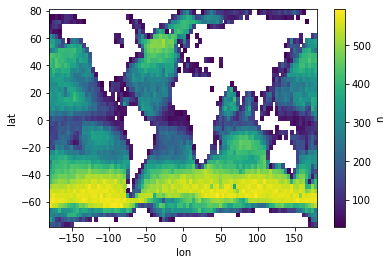

time: 453 ms (started: 2021-04-09 10:05:12 +02:00)


In [35]:
ds['n'].mean(dim='month').plot(x='lon',y='lat')

Plot bias for selected month

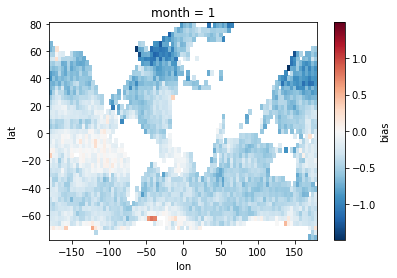

time: 469 ms (started: 2021-04-09 10:05:13 +02:00)


In [36]:
ds['bias'].sel(month=1).plot(x='lon',y='lat')

Plot rmse of all months

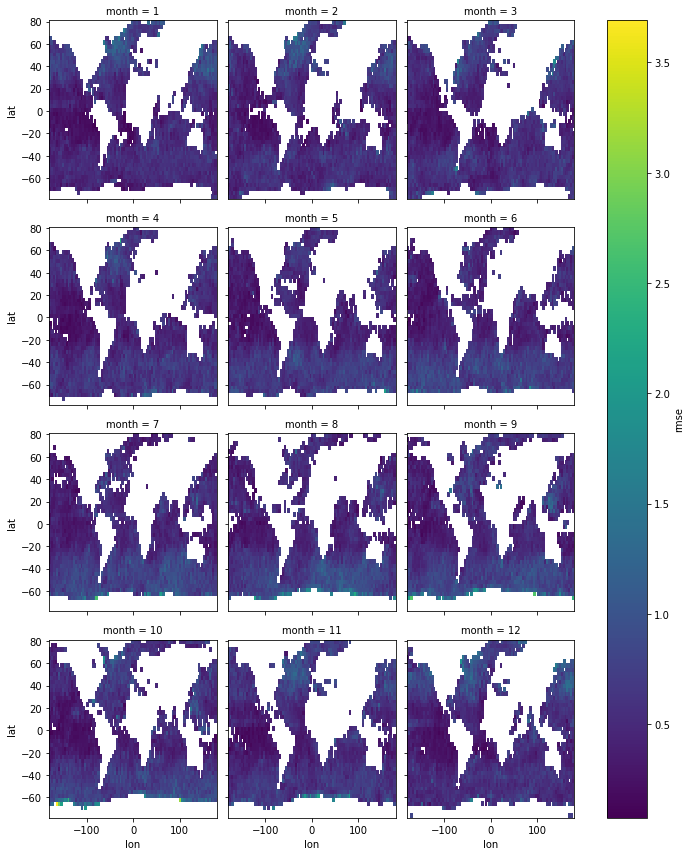

time: 2.42 s (started: 2021-04-09 10:05:13 +02:00)


In [37]:
ds['rmse'].plot(x='lon',y='lat',col='month',col_wrap=3)

Vertical cross section of bias per month

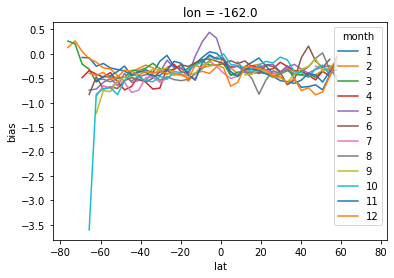

time: 750 ms (started: 2021-04-09 10:05:16 +02:00)


In [38]:
ds['bias'].sel(lon=-162).plot(x='lat',hue='month')
